In [89]:
import pandas as pd

In [90]:
import pandas as pd
import glob
import os

# Find all files ending with _metrics.csv in ../Results
files = glob.glob("Results/*_metrics.csv")

# Option 1: Load into a dictionary (keep separate)
dfs = {os.path.basename(f): pd.read_csv(f) for f in files}

# Example: access one file
# dfs["experiment1_metrics.csv"].head()

# Option 2: Concatenate into one dataframe (add filename column)
all_metrics = []
for f in files:
    df = pd.read_csv(f)
    df["source_file"] = os.path.basename(f)  # keep track of origin
    all_metrics.append(df)

all_metrics_df = pd.concat(all_metrics, ignore_index=True)

# Now you have all results in one dataframe
all_metrics_df.head()


,Fold_no,Accuracy,F1 Score,Precision,Recall,Specificity,PR AUC,ROC AUC,Model_name,TN,TP,FP,FN,source_file
0,Fold 1,0.693281,0.042463,0.022007,0.602410,0.694318,0.030292,0.718392,LogisticRegression,5047,50,2222,33,PredictionsLASSORegression_PredictionsLASSOReg...
1,Fold 2,0.690424,0.049290,0.025530,0.710843,0.690191,0.032659,0.754438,LogisticRegression,5017,59,2252,24,PredictionsLASSORegression_PredictionsLASSOReg...
2,Fold 3,0.669206,0.044776,0.023143,0.686747,0.669005,0.035807,0.746236,LogisticRegression,4863,57,2406,26,PredictionsLASSORegression_PredictionsLASSOReg...
3,Fold 4,0.679499,0.045381,0.023470,0.682927,0.679461,0.034059,0.751720,LogisticRegression,4939,56,2330,26,PredictionsLASSORegression_PredictionsLASSOReg...
4,Fold 5,0.693783,0.040903,0.021201,0.578313,0.695102,0.028208,0.697628,LogisticRegression,5052,48,2216,35,PredictionsLASSORegression_PredictionsLASSOReg...


In [91]:
all_metrics_df.groupby(["source_file"]).mean().sort_values(by=["PR AUC"])

/var/tmp/pbs.1017932.pbs-7/ipykernel_1459390/423941617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_metrics_df.groupby(["source_file"]).mean().sort_values(by=["PR AUC"])


,Accuracy,F1 Score,Precision,Recall,Specificity,PR AUC,ROC AUC,TN,TP,FP,FN
source_file,,,,,,,,,,,
PredictionsLASSORegression_proteins_residuals_PD_HC_unique_PD_OND_residualisedhealthycontrol_SIMPLEMEDIAN_f1_Training_prodromals_residualstraining_metrics.csv,0.611187,0.025249,0.012997,0.444696,0.613088,0.014309,0.536075,4456.4,36.8,2812.4,46.0
PredictionsLASSORegression_proteins_residuals_PD_HC_unique_PD_OND_residualised_training_SIMPLEMEDIAN_f1_Training_prodromals_residualstraining_metrics.csv,0.626177,0.026300,0.013548,0.449221,0.628192,0.015298,0.543472,4566.2,37.2,2702.6,45.6
PredictionsLightGBM_balanced_proteins_matched_baseline_PD_HC_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.569375,0.028727,0.014759,0.557861,0.569502,0.016750,0.594823,4139.6,46.2,3129.2,36.6
PredictionsLogisticRegression_proteins_matched_baseline_PD_HC_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.601474,0.029789,0.015314,0.543491,0.602135,0.016877,0.598392,4376.8,45.0,2892.0,37.8
PredictionsLASSORegression_proteins_residuals_PD_HC_unique_residualised_training_SIMPLEMEDIAN_f1_Training_prodromals_residualstraining_metrics.csv,0.598455,0.025312,0.013010,0.465971,0.599961,0.016951,0.547032,4361.0,38.6,2907.8,44.2
...,...,...,...,...,...,...,...,...,...,...,...
PredictionsLogisticRegression_proteins_residuals_PD_HC_residualisedhealthycontrol_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.708118,0.045891,0.023823,0.623215,0.709085,0.033615,0.727741,5154.2,51.6,2114.6,31.2
PredictionsLogisticRegression_PredictionsLASSORegression_proteins_matched_all_PD_HC_unique_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.687361,0.045151,0.023391,0.652160,0.687762,0.033639,0.736461,4999.2,54.0,2269.6,28.8
PredictionsRandomForest_subsample_proteins_residuals_PD_HC_unique_residualised_training_SIMPLEMEDIAN_f1_Training_all_prodromals_metrics.csv,0.918928,0.062098,0.036393,0.227153,0.926810,0.033932,0.711402,6736.8,18.8,532.0,64.0


In [92]:
# Group by 'source_file' and take the mean
grouped_means = all_metrics_df.groupby("source_file").mean()

# Filter based on the mean values
filtered_df = grouped_means[
    (grouped_means["Specificity"] > 0.6) &
    (grouped_means["Recall"] > 0.6)
]


/var/tmp/pbs.1017932.pbs-7/ipykernel_1459390/3095755330.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = all_metrics_df.groupby("source_file").mean()


In [93]:
source_list = filtered_df.reset_index()["source_file"].tolist()

In [94]:
filtered_df = all_metrics_df[all_metrics_df["source_file"].isin(source_list)]

In [95]:
filtered_df.groupby("source_file").mean()

/var/tmp/pbs.1017932.pbs-7/ipykernel_1459390/1795223734.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df.groupby("source_file").mean()


,Accuracy,F1 Score,Precision,Recall,Specificity,PR AUC,ROC AUC,TN,TP,FP,FN
source_file,,,,,,,,,,,
PredictionsBalancedRandomForest_PredictionsLightGBM_balanced_proteins_residuals_PD_HC_unique_PD_OND_residualised_training_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.600631,0.034172,0.017570,0.625507,0.600346,0.021496,0.658600,4363.8,51.8,2905.0,31.0
PredictionsLASSORegression_PredictionsLASSORegression_proteins_cox_PD_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.655014,0.039244,0.020257,0.625771,0.655349,0.024846,0.692402,4763.6,51.8,2505.2,31.0
PredictionsLASSORegression_PredictionsLASSORegression_proteins_cox_specificPD_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.642227,0.037098,0.019130,0.610961,0.642582,0.027816,0.671210,4670.8,50.6,2598.0,32.2
PredictionsLASSORegression_PredictionsLASSORegression_proteins_matched_all_PD_HC_unique_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.687171,0.045416,0.023529,0.656979,0.687514,0.033254,0.732729,4997.4,54.4,2271.4,28.4
PredictionsLASSORegression_PredictionsLASSORegression_proteins_residuals_PD_HC_PD_OND_residualisedhealthycontrol_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.665597,0.041012,0.021190,0.635322,0.665942,0.027973,0.706982,4840.6,52.6,2428.2,30.2
PredictionsLASSORegression_PredictionsLASSORegression_proteins_residuals_PD_HC_PD_OND_residualisedtraining_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.657489,0.038883,0.020075,0.616074,0.657963,0.026590,0.704888,4782.6,51.0,2486.2,31.8
PredictionsLASSORegression_PredictionsLASSORegression_proteins_residuals_PD_HC_residualisedhealthycontrol_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.690733,0.045604,0.023625,0.657302,0.691118,0.034753,0.737761,5023.6,54.4,2245.2,28.4
PredictionsLASSORegression_PredictionsLASSORegression_proteins_residuals_PD_HC_residualisedtraining_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.685239,0.044563,0.023070,0.652248,0.685615,0.032205,0.733683,4983.6,54.0,2285.2,28.8
PredictionsLASSORegression_PredictionsLASSORegression_proteins_residuals_PD_HC_unique_PD_OND_residualised_training_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.682437,0.042442,0.021971,0.625566,0.683084,0.029861,0.714755,4965.2,51.8,2303.6,31.0


In [96]:
filtered_df[filtered_df["source_file"] == 'PredictionsLASSORegression_PredictionsLASSORegression_proteins_residuals_PD_HC_residualisedhealthycontrol_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv'].mean()

/var/tmp/pbs.1017932.pbs-7/ipykernel_1459390/3650127931.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_df[filtered_df["source_file"] == 'PredictionsLASSORegression_PredictionsLASSORegression_proteins_residuals_PD_HC_residualisedhealthycontrol_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv'].mean()


Accuracy          0.690733
F1 Score          0.045604
Precision         0.023625
Recall            0.657302
Specificity       0.691118
PR AUC            0.034753
ROC AUC           0.737761
TN             5023.600000
TP               54.400000
FP             2245.200000
FN               28.400000
dtype: float64

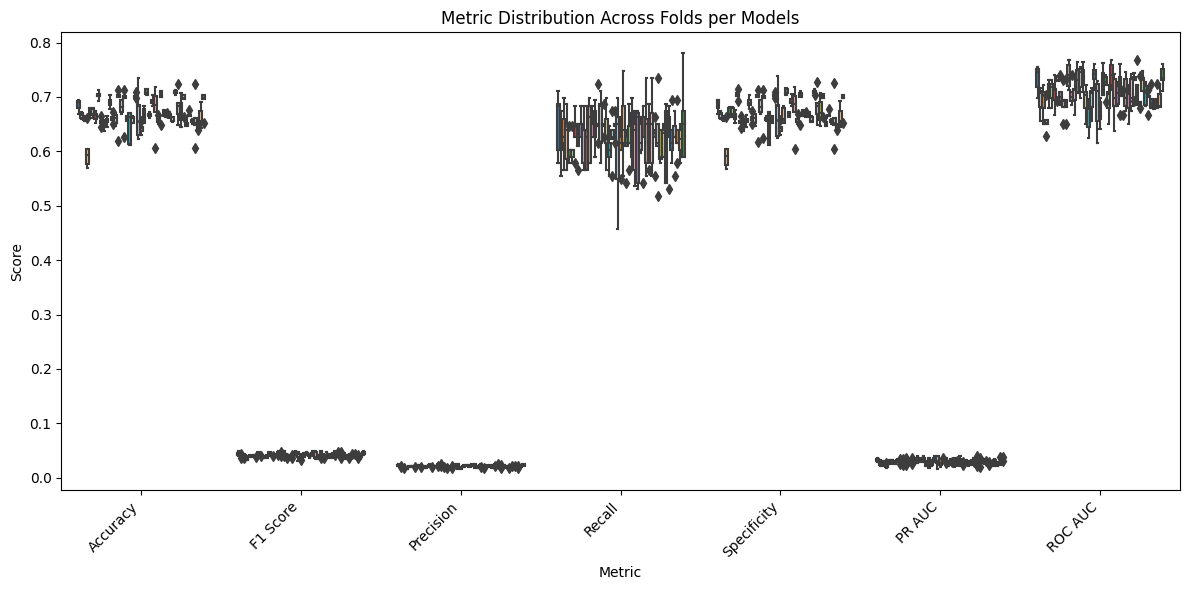

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Keep only numeric columns + source_file
numeric_cols = filtered_df.select_dtypes(include="number").columns.tolist()
metrics = [c for c in numeric_cols if c not in ["TN", "TP", "FP", "FN"]]

# Melt into long format
melted = filtered_df.melt(
    id_vars=["source_file"],
    value_vars=metrics,
    var_name="metric",
    value_name="value"
)

# Ensure numeric type
melted["value"] = pd.to_numeric(melted["value"], errors="coerce")

# Drop NaNs (just in case)
melted = melted.dropna(subset=["value"])

# Choose a palette with more colors
unique_sources = melted["source_file"].nunique()
palette = sns.color_palette("tab20", n_colors=unique_sources)

# Plot: distribution of metrics across folds and source files
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=melted,
    x="metric", y="value",
    hue="source_file",
    palette=palette
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.title("Metric Distribution Across Folds per Models")

# Remove legend
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


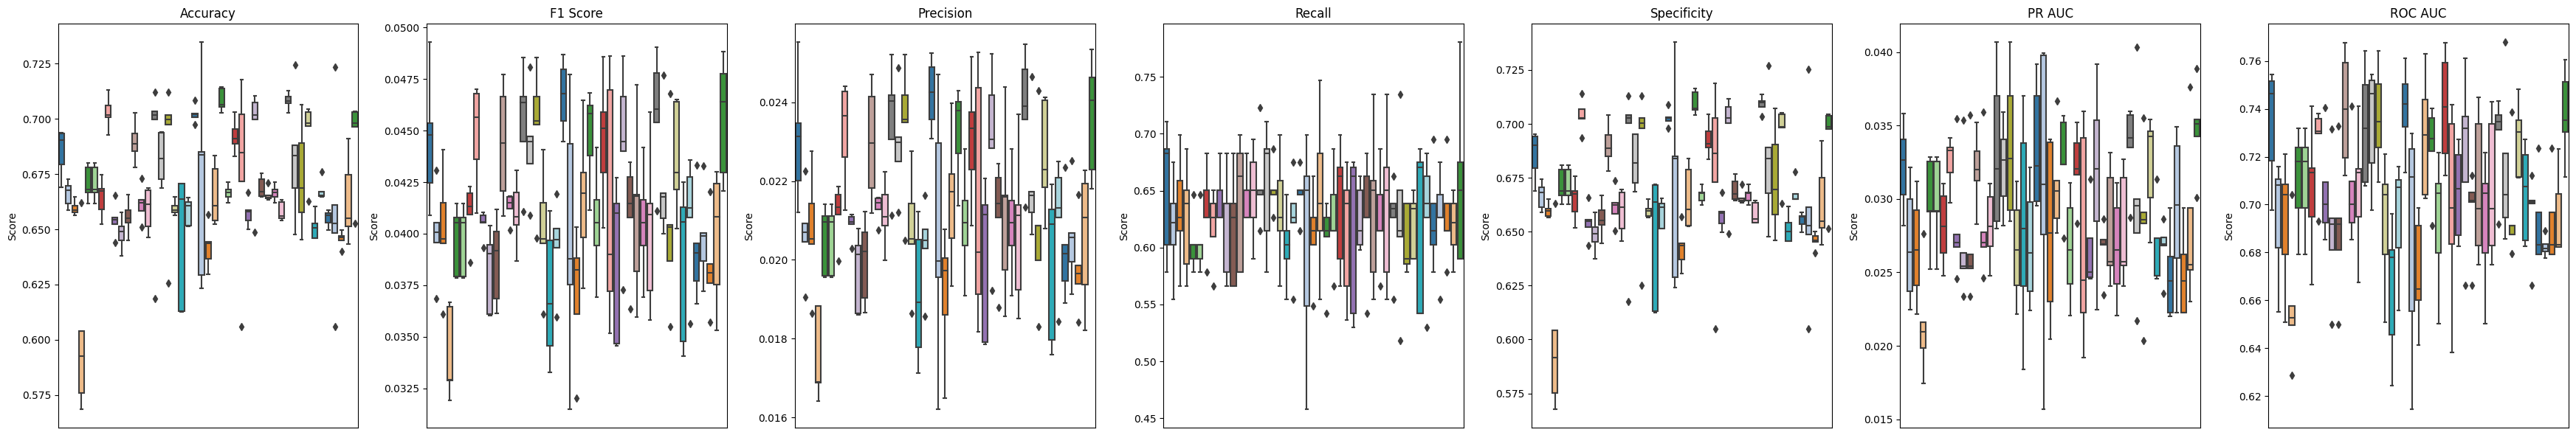

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Keep only numeric columns + source_file
numeric_cols = filtered_df.select_dtypes(include="number").columns.tolist()
metrics = [c for c in numeric_cols if c not in ["TN", "TP", "FP", "FN"]]

# Melt into long format
melted = filtered_df.melt(
    id_vars=["source_file"],
    value_vars=metrics,
    var_name="metric",
    value_name="value"
)

# Ensure numeric type
melted["value"] = pd.to_numeric(melted["value"], errors="coerce")
melted = melted.dropna(subset=["value"])

# Choose a palette with enough colors
unique_sources = melted["source_file"].nunique()
palette = sns.color_palette("tab20", n_colors=unique_sources)

# Plot: separate subplot for each metric
num_metrics = len(metrics)
fig, axes = plt.subplots(1, num_metrics, figsize=(5*num_metrics, 6), sharey=False)

for ax, metric in zip(axes, metrics):
    sns.boxplot(
        data=melted[melted["metric"] == metric],
        x="source_file", y="value",
        palette=palette,
        ax=ax
    )
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_xticks([])  # Remove x-ticks

plt.tight_layout()
plt.savefig("Metricsvisualisation.pdf")
